In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from os import path
import os
from astropy.io import fits
from sklearn.metrics import mean_squared_error

from spectrum import Spectrum, FitsSpectrum
from common import list_files, list_directories, tqdm

In [2]:
# dib_centra_list = [float(dib_file.replace('.ascii', '')) for dib_file in os.listdir('data/dibs')]
dib_centra_list=[5780,5797,6196,6379,6613,7224]

print(dib_centra_list)

[5780, 5797, 6196, 6379, 6613, 7224]


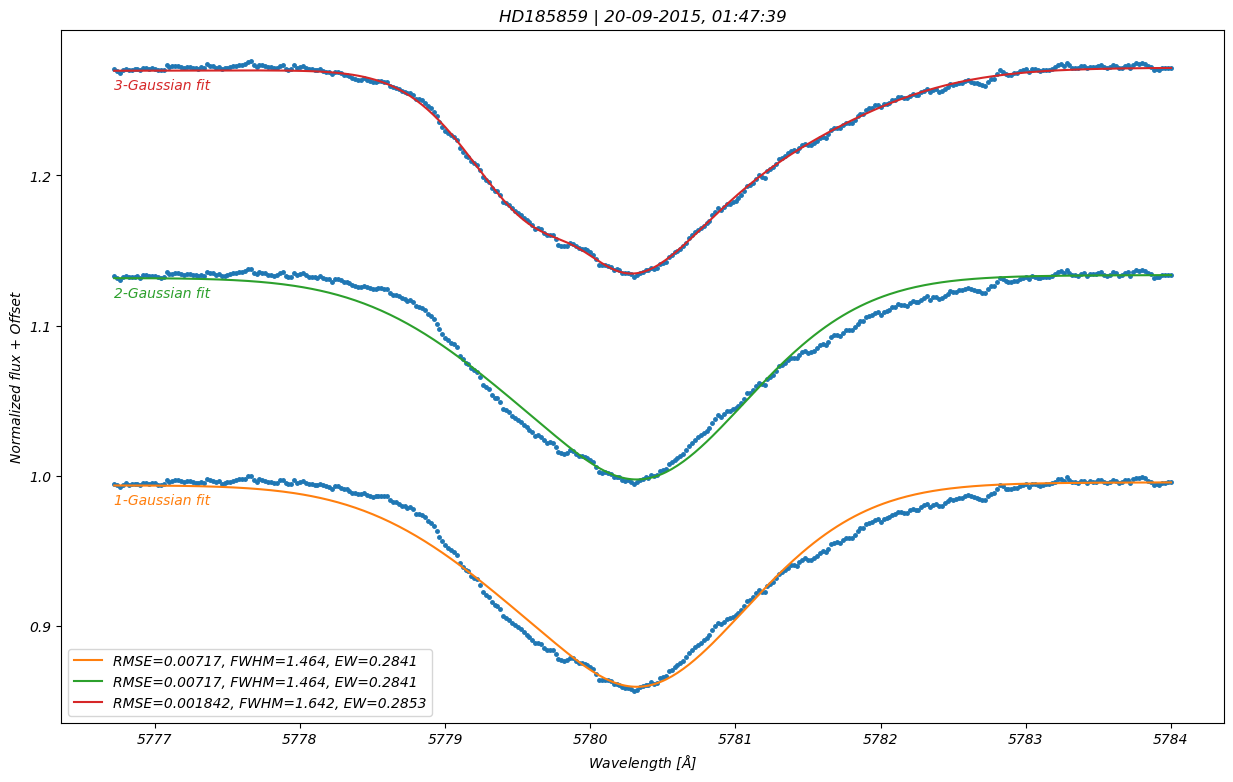

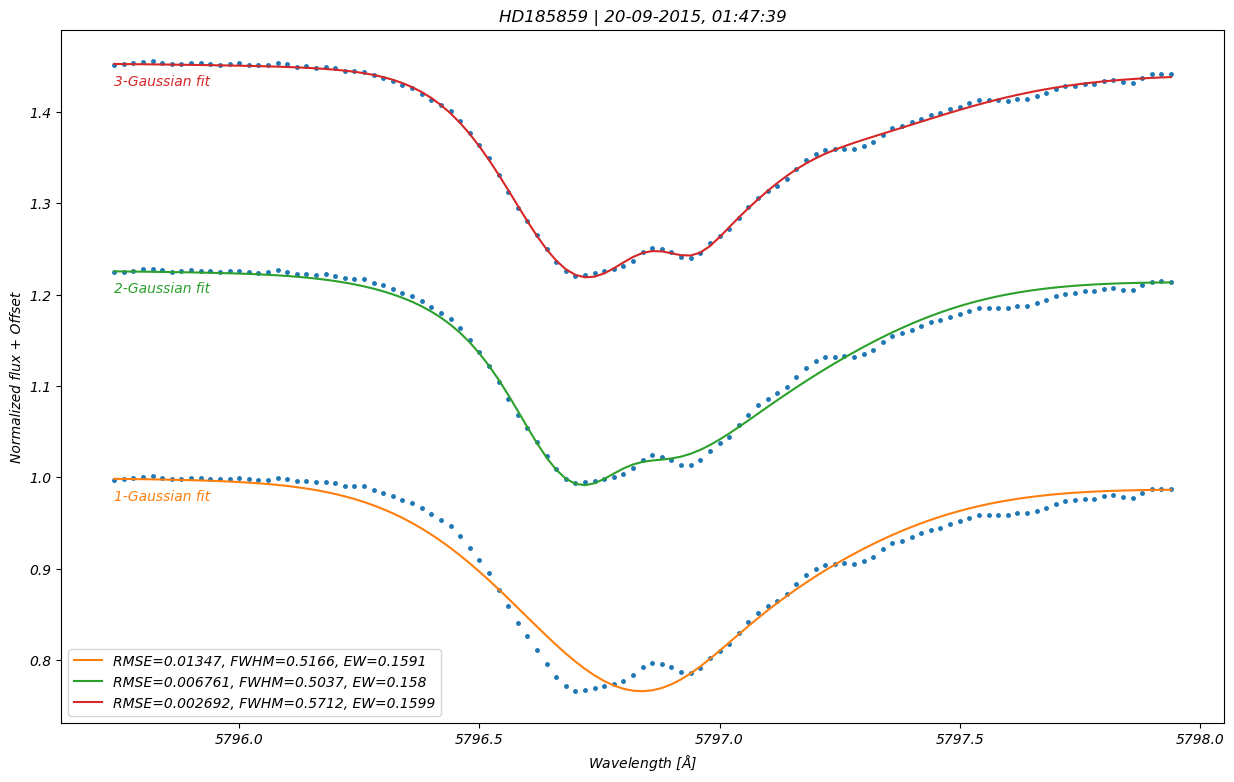

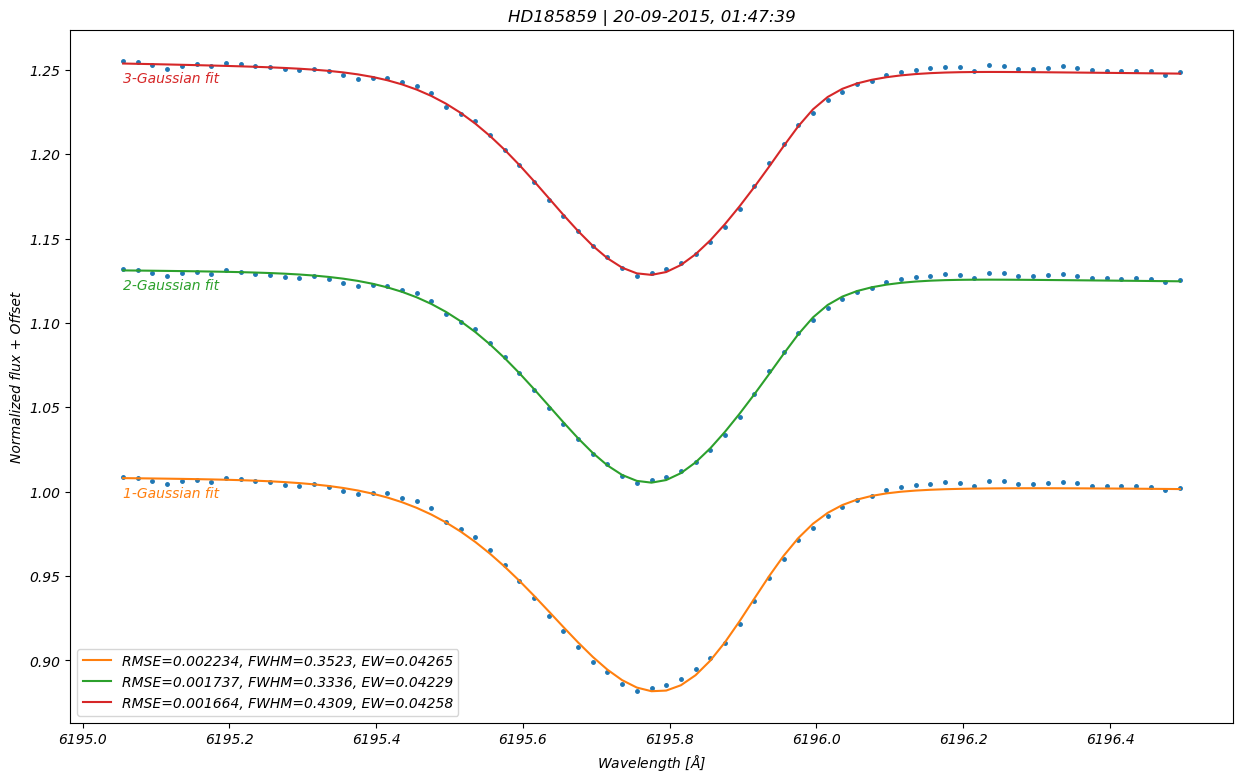

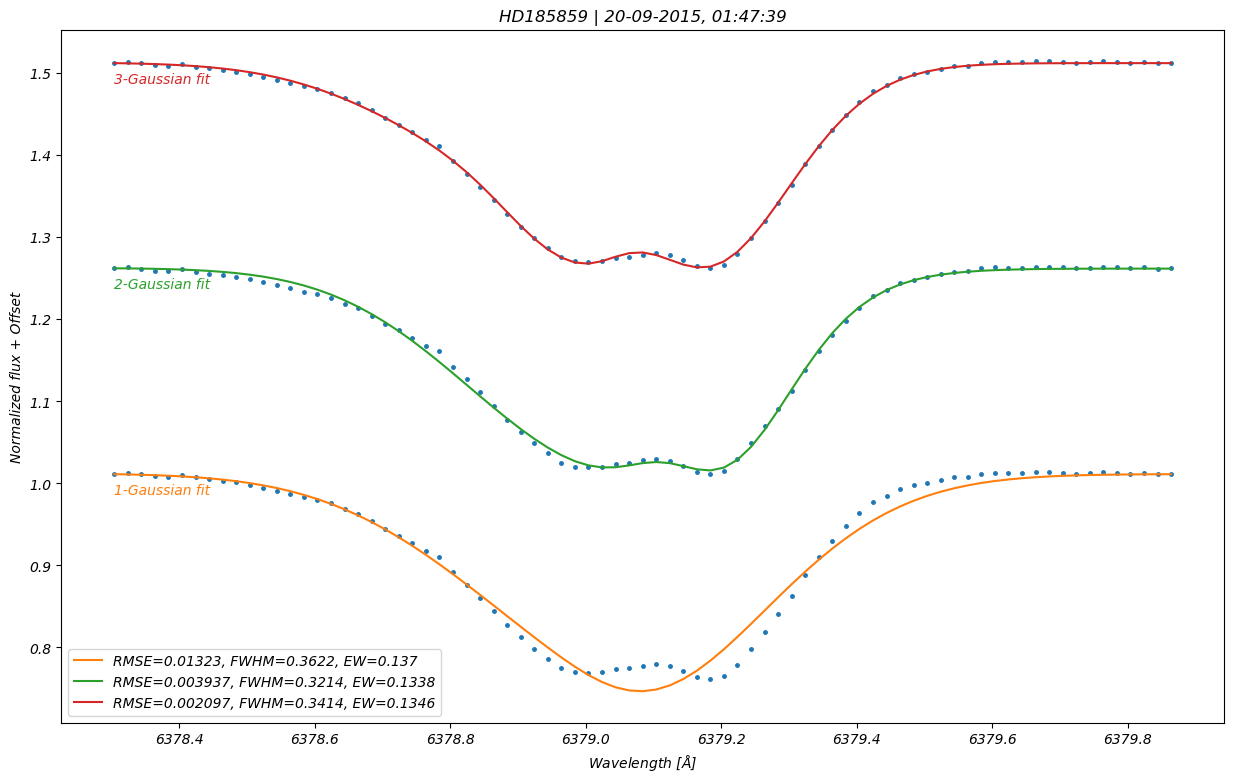

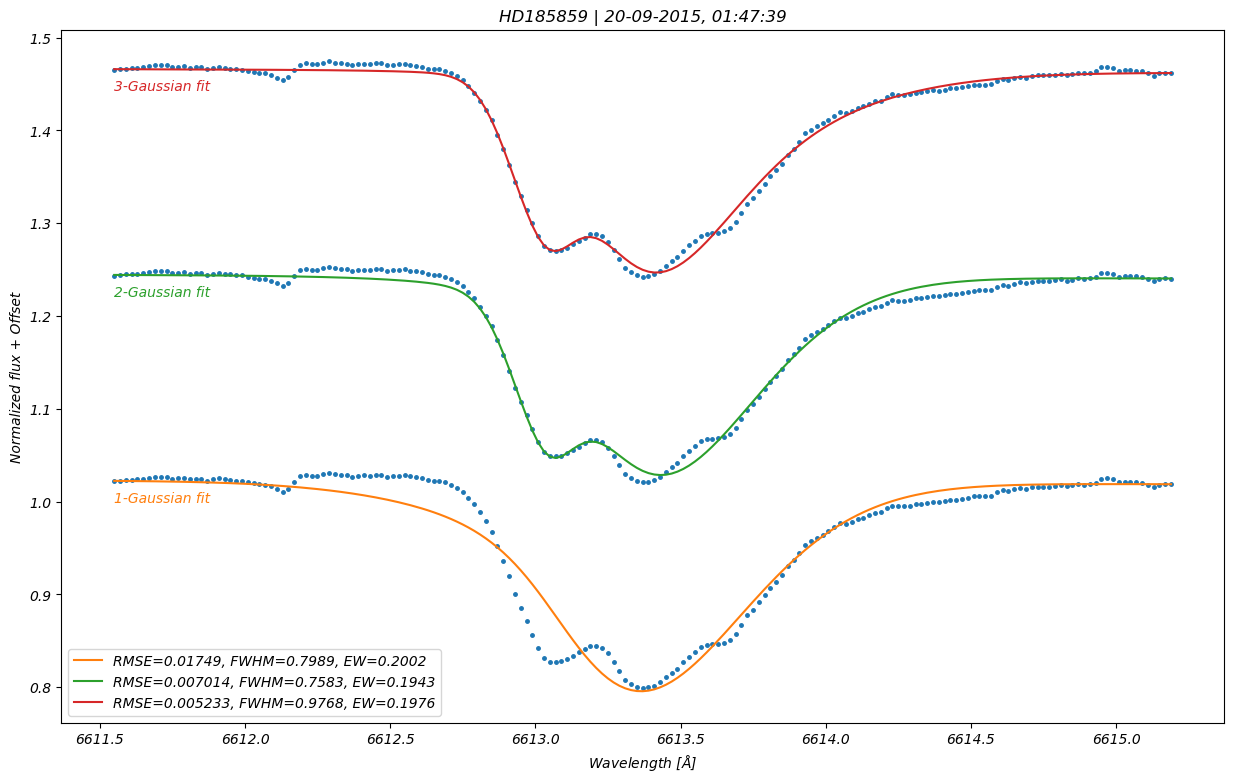

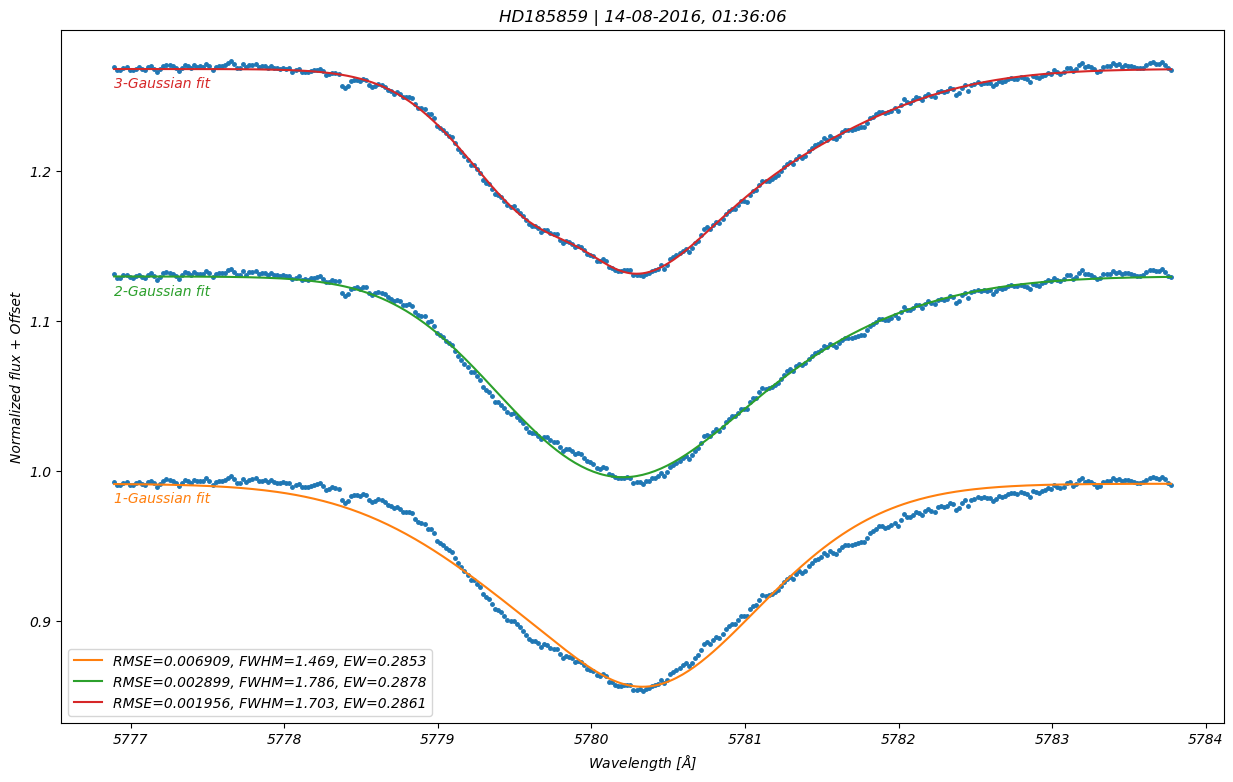

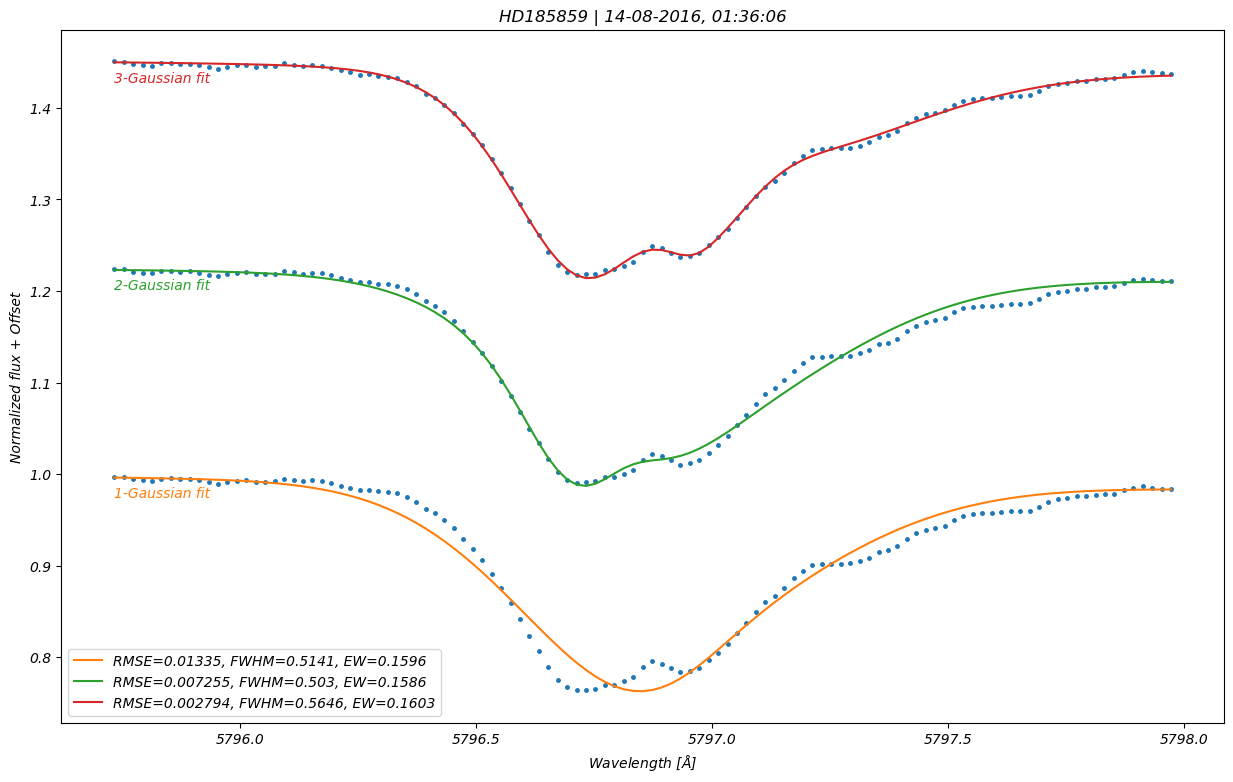

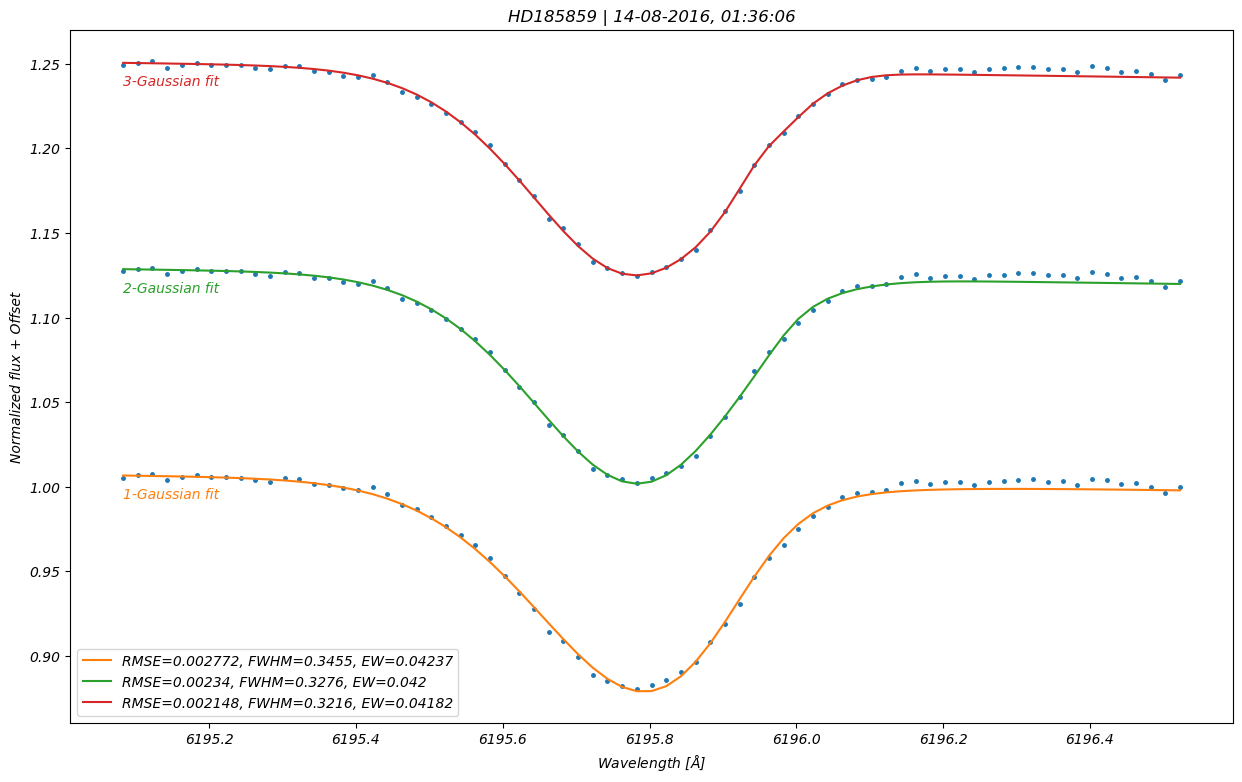

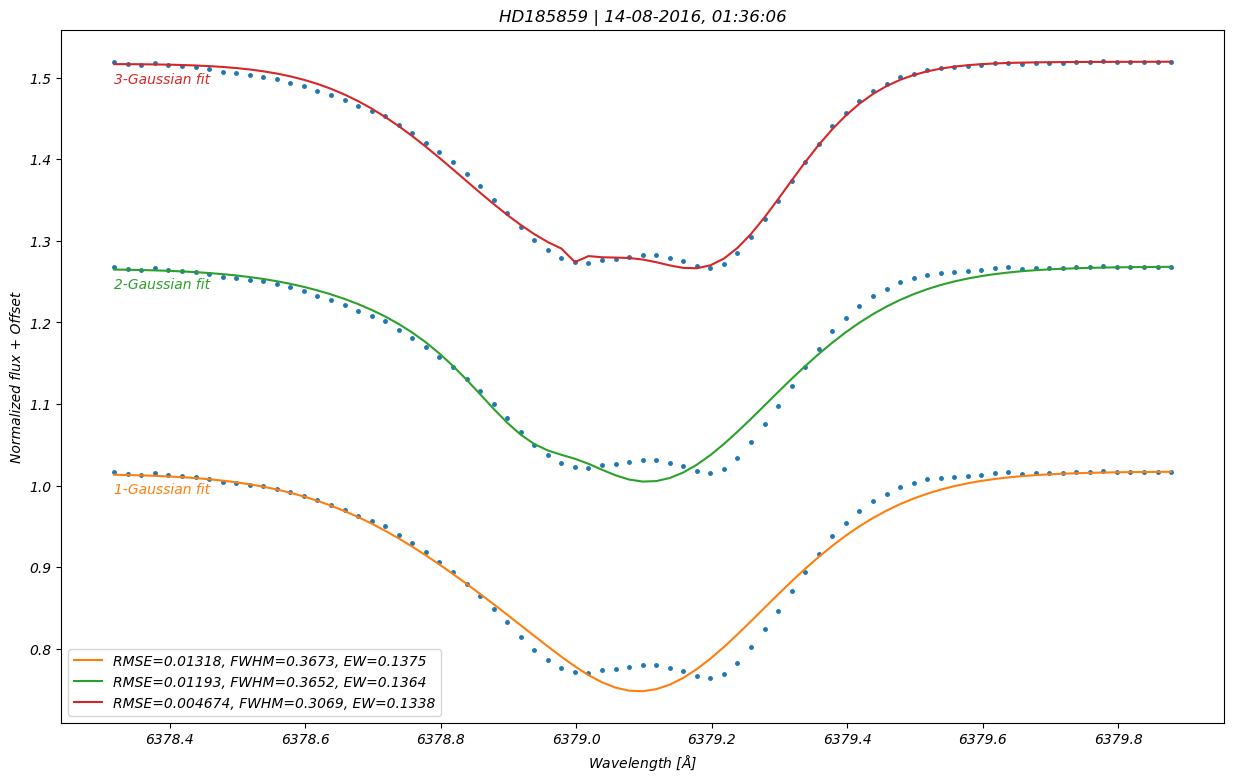

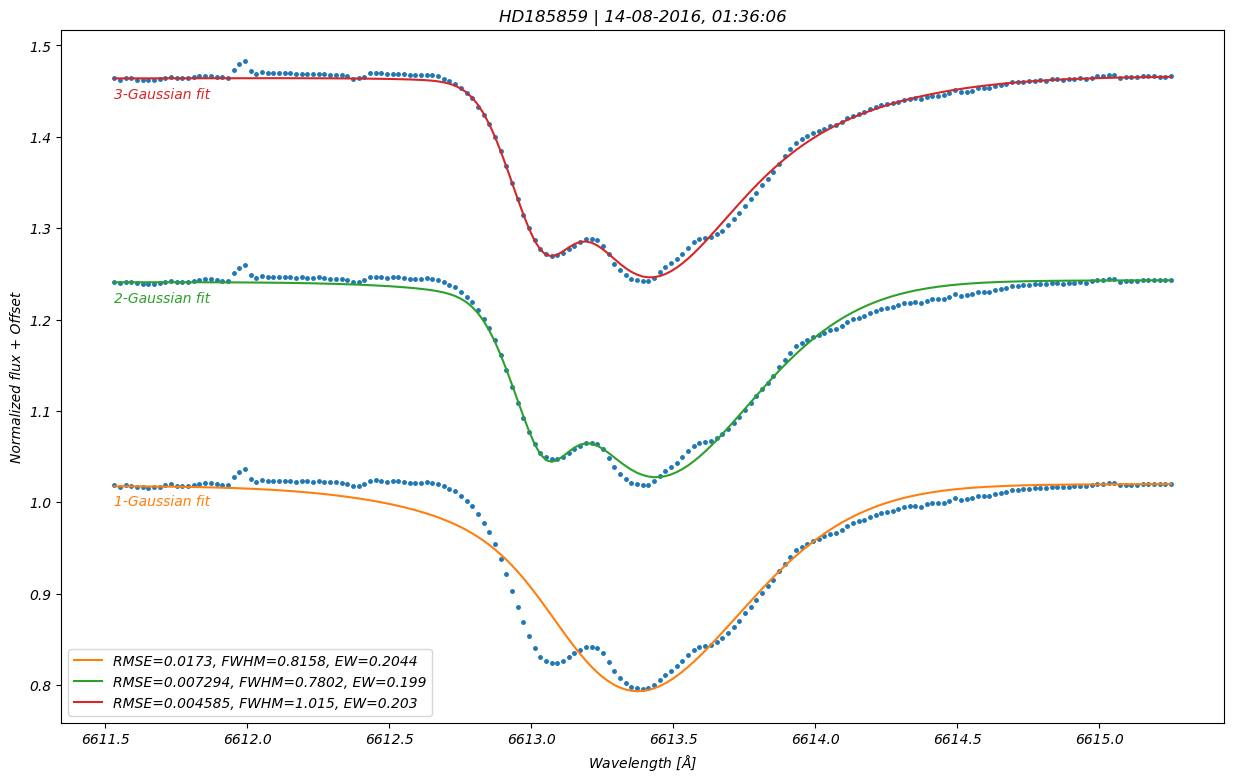

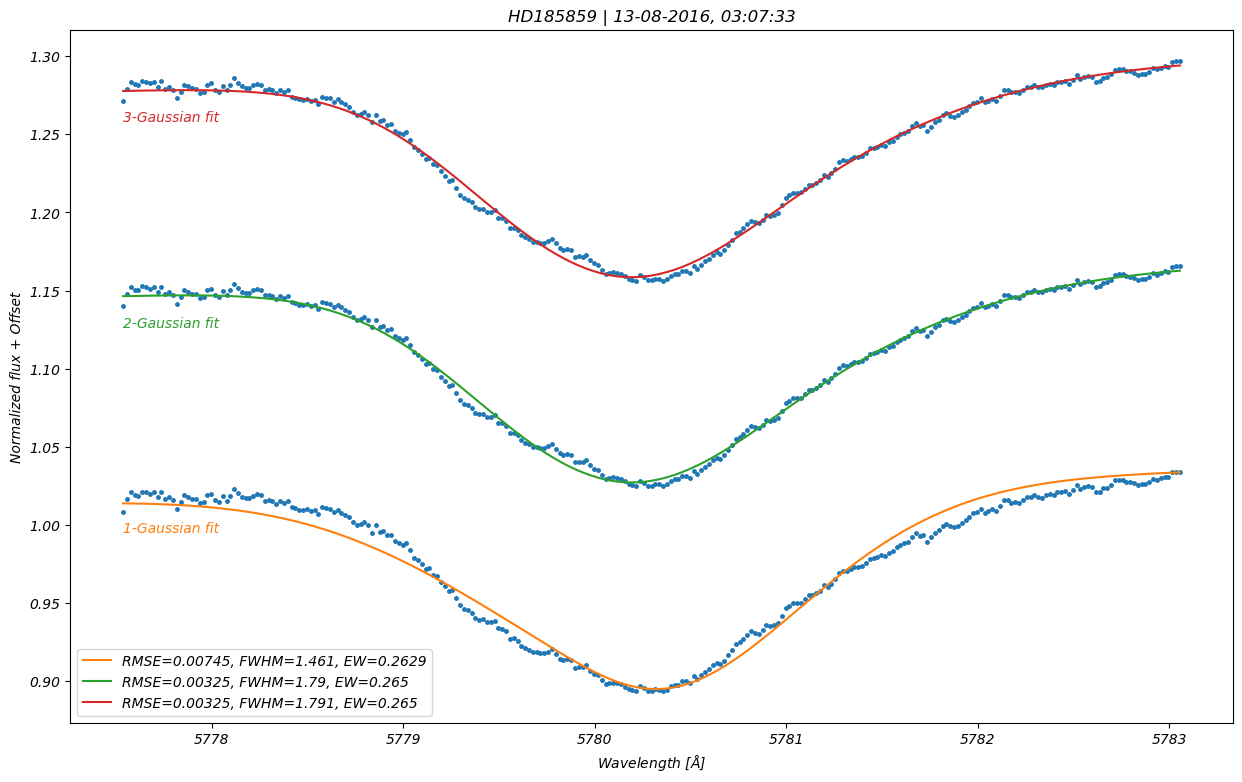

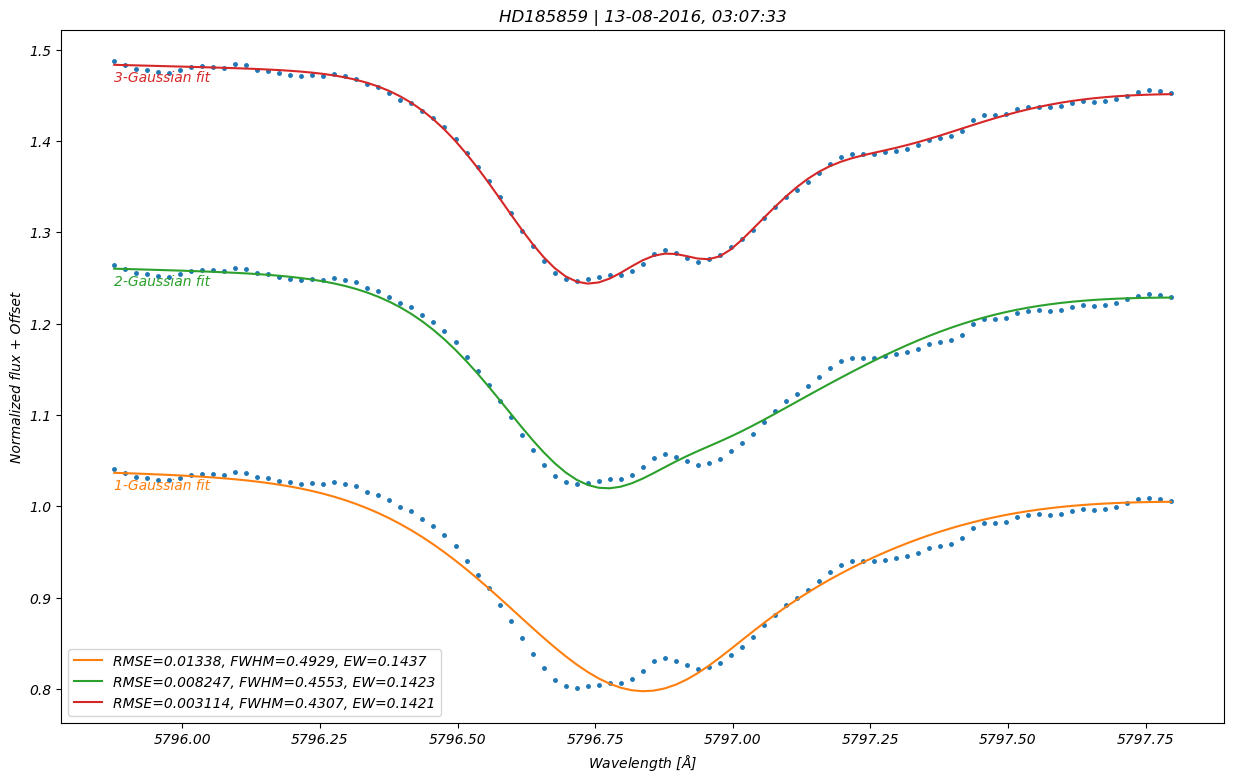

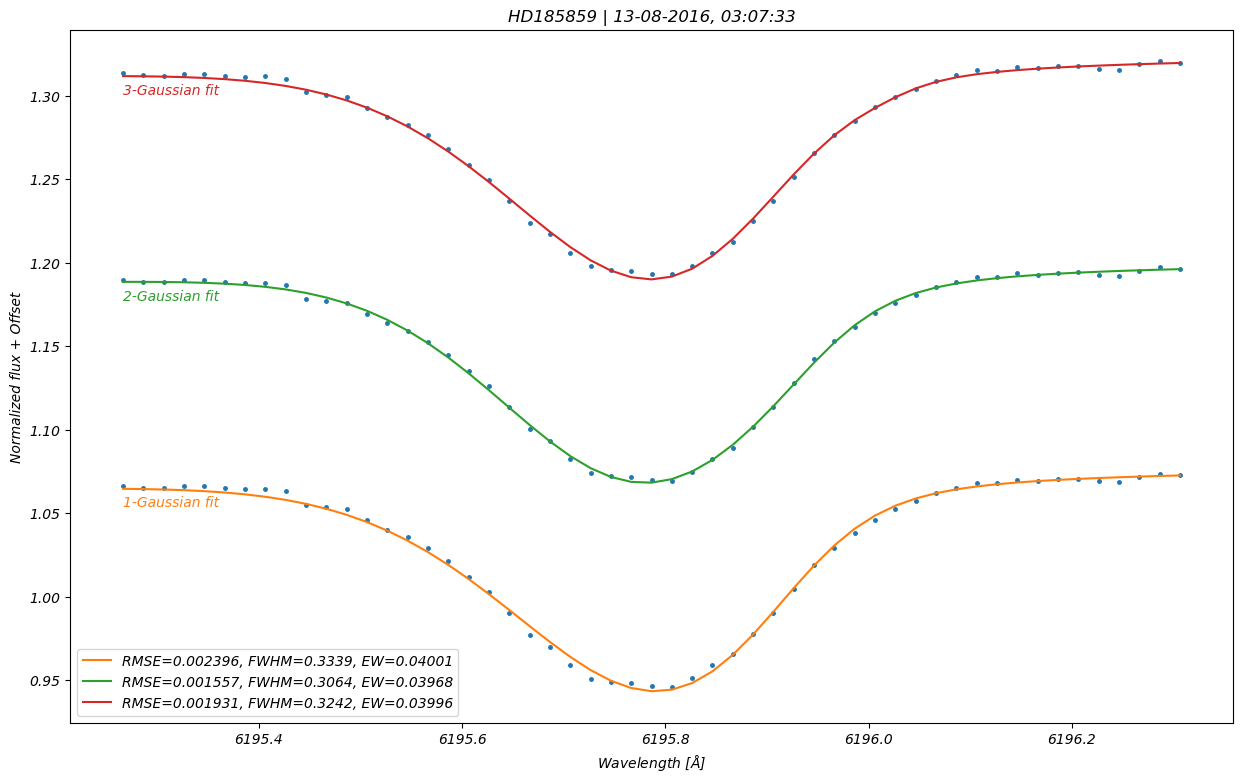

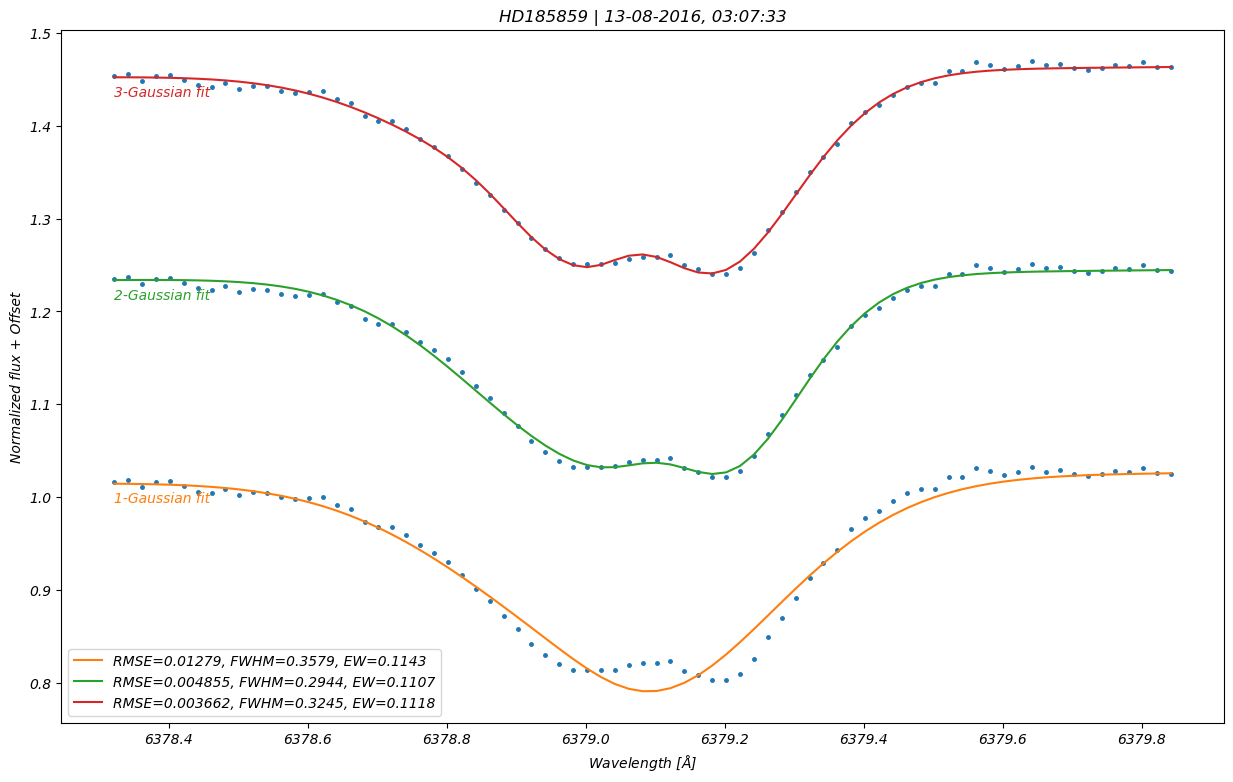

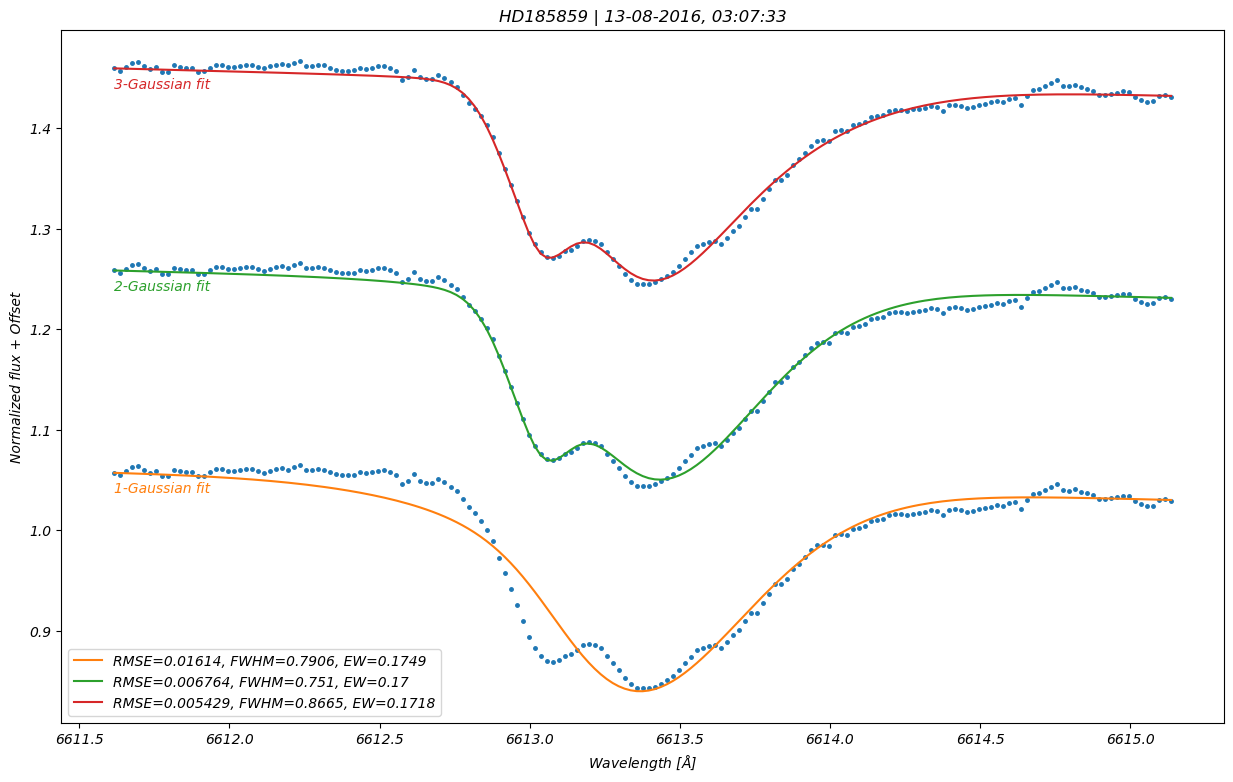

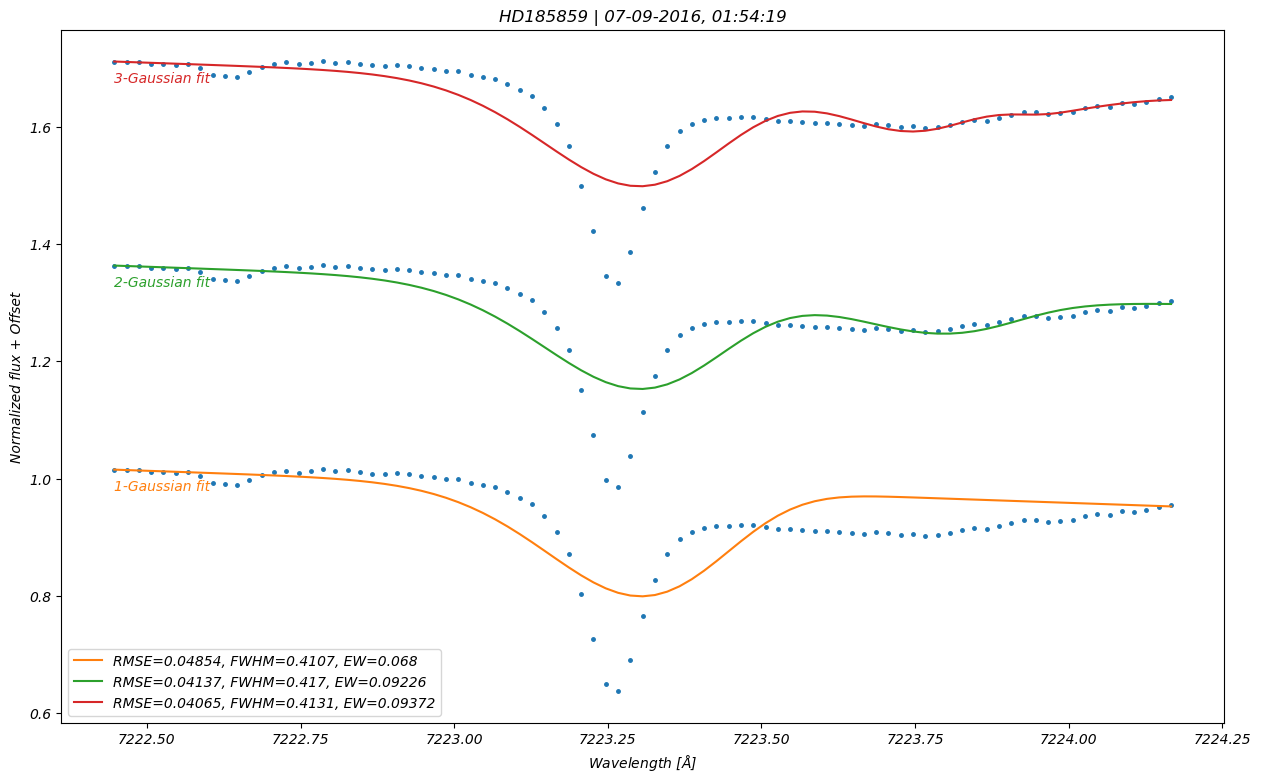

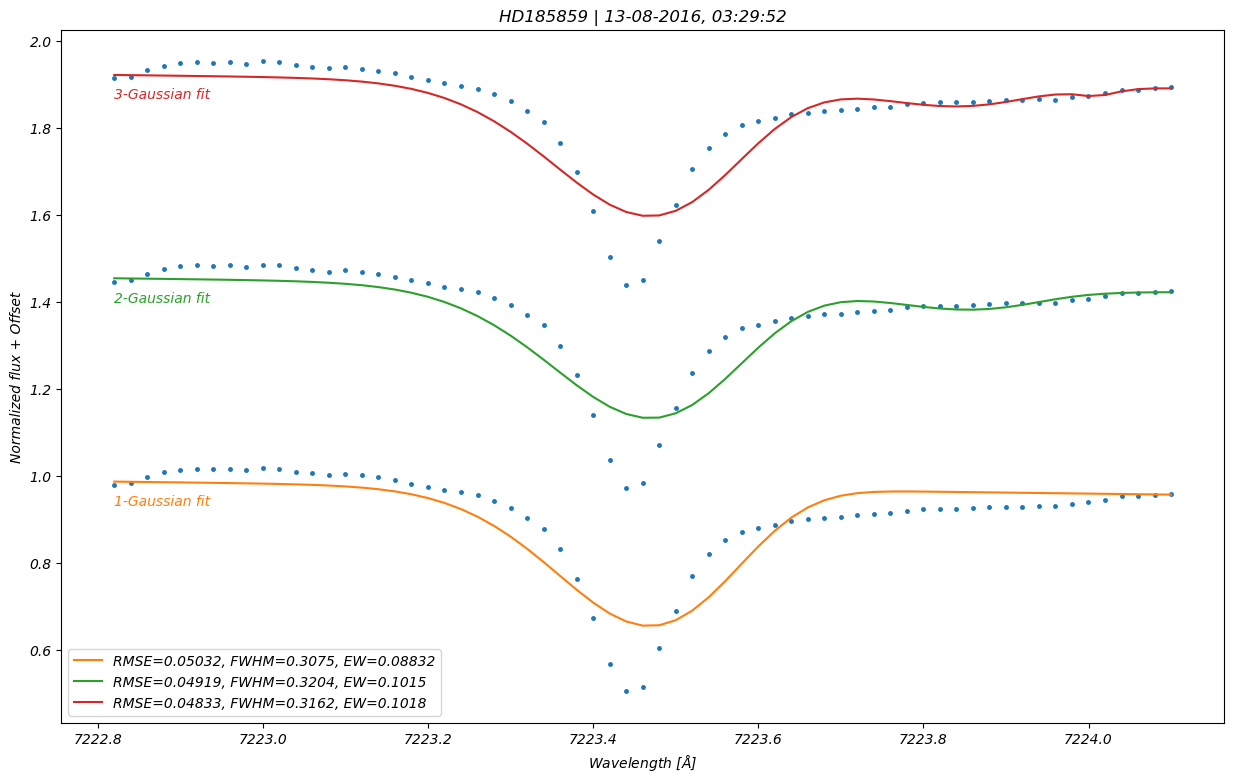

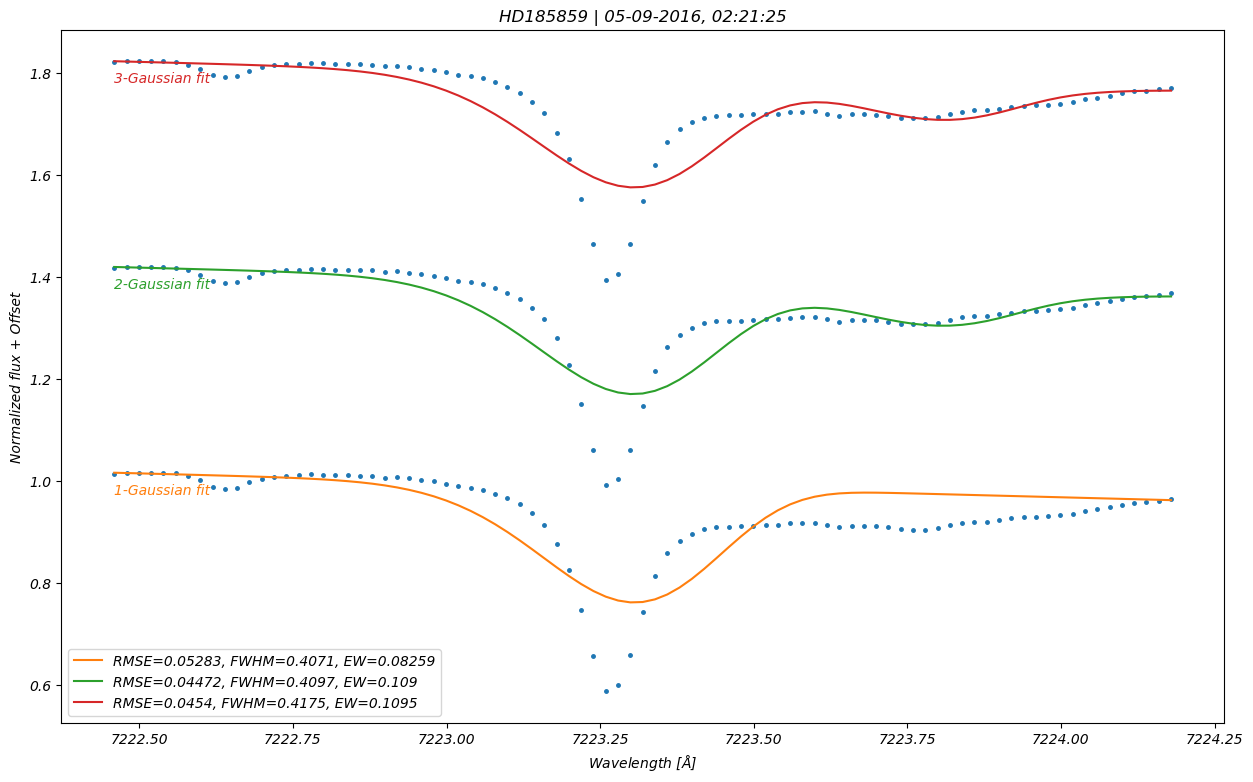

In [6]:
def load_target(target_dir: str) -> list[FitsSpectrum]:
    return [FitsSpectrum(datafile) for band_dir in list_directories(target_dir) for datafile in list_files(band_dir)]

hd185859 = load_target('data/fits/HD185859')
table_headers = ['Observation date', 'Target', 'Expected center [Å]', 'Slope', 'Start', 'Center [Å]', 'Width', 'Amplitude', 'Skew', 'RMSE', 'FWHM [Å]', 'EW [Å]']
table_data = []

for subspectrum in hd185859:
    subspectrum.remove_outliers()
    subspectrum.normalize(max_degree=10)
    subspectrum.correct_shift()

    wvl_max, wvl_min = np.max(subspectrum.wavelength), np.min(subspectrum.wavelength)
    for center in dib_centra_list:
        # The DIB does not lie in this subspectrum
        if not wvl_min < center < wvl_max:
            continue

        fig, ax = plt.subplots(1, 1, figsize=(15, 9))
        subspectrum.select_dib(center, ax=ax)
        # result = 

        # if result is None:
        #     continue

        # _, params, rmse, fwhm, ew, is_double = result
        # table_data.append([subspectrum.obs_date, subspectrum.target, center, *params, rmse, fwhm, ew])

# tabulate(table_data, table_headers, tablefmt='html')

In [ ]:
table_headers = ['Observation date', 'Target', 'Expected center [Å]', 'Center [Å]', 'Width', 'Amplitude', 'Skew', 'Slope', 'Start', 'RMSE', 'FWHM [Å]', 'EW [Å]']
table_data = []

def fit_gaussian_for_target(target: str):
    subspectra = load_target(f'data/fits/{target}')
    
    for subspectrum in subspectra:
        subspectrum.remove_outliers()
        subspectrum.normalize(max_degree=10)
        subspectrum.correct_shift()

        wvl_max, wvl_min = np.max(subspectrum.wavelength), np.min(subspectrum.wavelength)
        for center in dib_centra_list:
            # The DIB does not lie in this subspectrum
            if not wvl_min < center < wvl_max:
                continue

            result = subspectrum.select_dib(center)

            if result is None:
                continue

            _, params, rmse, fwhm, ew = result
            table_data.append([subspectrum.obs_date, subspectrum.target, center, *params, rmse, fwhm, ew])

for target in ['HD147889', 'HD170740', 'HD185859']:
    fit_gaussian_for_target(target)

np.savetxt('out/gaussian_fits_selected.txt', table_data, fmt='%s')
tabulate(table_data, table_headers, tablefmt='html')

In [ ]:
table_data = []
for target in os.listdir('data/fits'):
    fit_gaussian_for_target(target)

np.savetxt('out/gaussian_fits_all.txt', table_data, fmt='%s')